In [ ]:
import json
import numpy as np

# Cargar el archivo JSON
with open('array_data_T1__Z.json', 'r') as f:
    datos_json = json.load(f)

# Convertir el JSON en un arreglo NumPy
datos_np = np.array(datos_json)

# Mostrar el arreglo NumPy
print("Arreglo NumPy:")
print(datos_np)


Arreglo NumPy:
[ 1.         -0.90718023 -0.83963156 -0.77447533 -0.71162681 -0.65100426
 -0.59252885 -0.53612452 -0.48171793 -0.42923832 -0.37861743 -0.32978944
 -0.28269084 -0.23726039 -0.19343899 -0.15116967 -0.11039744 -0.07106929
 -0.03313406  0.00345757  0.03875319  0.07279872  0.10563841  0.13731499
  0.16786964  0.19734211  0.22577071  0.25319243  0.27964293  0.3051566
  0.32976662  0.353505    0.37640262  0.39848924  0.4197936   0.44034341
  0.46016537  0.47928528  0.497728    0.51551751  0.53267696  0.54922864
  0.5651941   0.58059409  0.59544865  0.60977708  0.62359803  0.63692947
  0.64978873  0.66219255  0.67415704  0.68569777  0.69682976  0.70756747
  0.71792487  0.72791543  0.73755214  0.74684755  0.75581372  0.76446233
  0.77280463  0.78085145  0.78861327  0.79610019  0.80332193  0.81028789
  0.81700713  0.82348839  0.82974009  0.83577037  0.84158707  0.84719775
  0.85260972  0.85783     0.86286539  0.86772243  0.87240745  0.87692653
  0.88128556  0.8854902   0.88954592 

In [ ]:
len(datos_np)

100

Parámetro a optimizado: 1.907180230488614
Parámetro b optimizado: 10096946.08548118


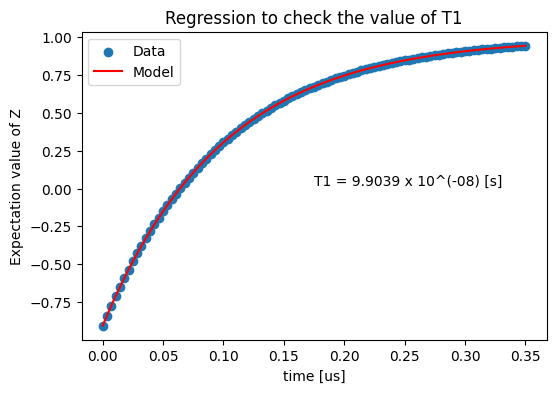

In [ ]:
import json
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Definir la función a ajustar
def modelo(t, a, b):
    return 1 - a * np.exp(-b * t)

# Cargar el archivo JSON
with open('array_data_T1__Z.json', 'r') as f:
    datos_json = json.load(f)

# Convertir el JSON en un arreglo NumPy
datos_np = np.array(datos_json)

# Supongamos que los primeros dos elementos de cada fila son características y el último elemento es la variable objetivo
# En este caso, supongamos que t está en la primera columna y la variable objetivo está en la segunda columna
t = np.linspace(0,350e-9, 99)
y = datos_np[1:]

# Ajustar el modelo a los datos
parametros_optimizados, matriz_covarianza = curve_fit(modelo, t, y, p0=[7, 1000])

# Mostrar los parámetros optimizados
a_optimizado, b_optimizado = parametros_optimizados
print("Parámetro a optimizado:", a_optimizado)
print("Parámetro b optimizado:", b_optimizado)

# Graficar los datos y el modelo ajustado
plt.figure(figsize = (6,4))
plt.scatter(t*1e6, y, label='Data')
plt.plot(t*1e6, modelo(t, a_optimizado, b_optimizado), color='red', label='Model')
plt.xlabel('time [us]')
plt.title("Regression to check the value of T1")
plt.ylabel('Expectation value of Z')

ax = plt.gca()
textstr = "T1 = 9.9039 x 10^(-08) [s]"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.5, 0.5, textstr, transform=ax.transAxes)

plt.legend()
plt.show()


In [ ]:
1e-7

1e-07

In [ ]:
10e-8

1e-07

In [ ]:
1/10096946.08548118

9.903984744832319e-08

In [ ]:
err1 = ((1e-7 - 9.903984744832319e-08)/1e-7)*100
err1

0.9601525516768059

Parámetro a optimizado: 1.4496104016907256
Parámetro b optimizado: 249200528.0252115
Parámetro c optimizado: 100080025133.0183
Parámetro d optimizado: -1.0634202160484623


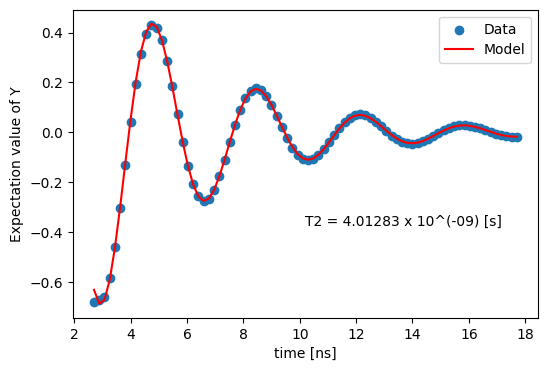

In [5]:
import json
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Definir la función a ajustar
def modelo(t, a, b, c, d):
    return a * np.exp(-b * t)*np.sin(c*t + d)

# Cargar el archivo JSON
with open('array_data_T1_T2_Y.json', 'r') as f:
    datos_json = json.load(f)

# Convertir el JSON en un arreglo NumPy
datos_np = np.array(datos_json)

# Supongamos que los primeros dos elementos de cada fila son características y el último elemento es la variable objetivo
# En este caso, supongamos que t está en la primera columna y la variable objetivo está en la segunda columna
y = datos_np[18:]
t = np.linspace(2.7e-9,17.7e-9, len(y))


# Ajustar el modelo a los datos
parametros_optimizados, matriz_covarianza = curve_fit(modelo, t, y, p0=[0.5,249999499.99999997,100e9, 0])

# Mostrar los parámetros optimizados
a_optimizado, b_optimizado, cc,dd = parametros_optimizados
print("Parámetro a optimizado:", a_optimizado)
print("Parámetro b optimizado:", b_optimizado)
print("Parámetro c optimizado:", cc)
print("Parámetro d optimizado:", dd)

# Graficar los datos y el modelo ajustado
plt.figure(figsize = (6,4))
plt.scatter(t*1e9, y, label='Data')
plt.plot(t*1e9, modelo(t, a_optimizado, b_optimizado, cc,dd), color='red', label='Model')
plt.xlabel('time [ns]')
plt.ylabel('Expectation value of Y')

ax = plt.gca()
textstr = "T2 = 4.01283 x 10^(-09) [s]"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.5, 0.3, textstr, transform=ax.transAxes)

plt.legend()
plt.show()


In [6]:
1/ b_optimizado

4.01283258877698e-09

In [ ]:
T1 = 1e-3, T2 = 4e-9

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-55-2dfd1684c77e>, line 1)

In [ ]:
T2_star = 1/((1/4e-9) - (1/(2*1e-3)))
1/T2_star

249999499.99999997